In [1]:
# first install the extra packages we need to run this example
!pip install quantstats stable_baselines3

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

import quantstats as qs

### Create Env

In [3]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


### Train Env

In [4]:
env.reset(seed=2023)
model = A2C('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=1_000)

### Test Env

In [5]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset(seed=2023)

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 1395, <Actions.Buy: 1>: 929}
info: {'total_reward': 224.19882202148438, 'total_profit': 0.000513570023365999, 'position': <Positions.Short: 0>}


### Plot Results

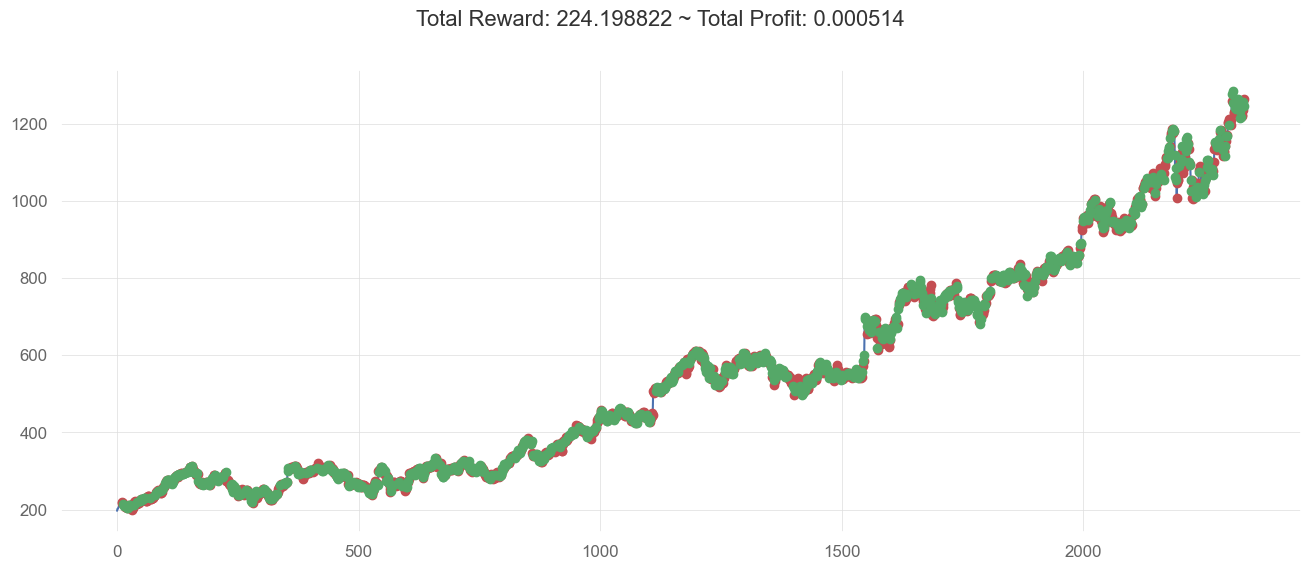

In [6]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

### Analysis Using `quantstats`

In [7]:
# we need a small tweak here before running the next cell as otherwise we run into the following error through the qs.reports.full(returns) API call below:


# File /opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/stats.py:96, in expected_return(returns, aggregate, compounded, prepare_returns)
#      94     returns = _utils._prepare_returns(returns)
#      95 returns = _utils.aggregate_returns(returns, aggregate, compounded)
# ---> 96 return _np.product(1 + returns) ** (1 / len(returns)) - 1
# 
# File /opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/__init__.py:414, in __getattr__(attr)
#     411     import numpy.char as char
#     412     return char.chararray
# --> 414 raise AttributeError("module {!r} has no attribute "
#     415                      "{!r}".format(__name__, attr))
# 
# AttributeError: module 'numpy' has no attribute 'product'
# 


# because since numpy 1.26.0 numpy.product has been removed (deprecated in 1.25.0), see also https://github.com/numpy/numpy/releases/tag/v1.25.0
# so just need to install the previous version and then restart the kernel
!pip uninstall -y numpy
!pip install numpy==v1.24.4
np.__version__

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-macosx_11_0_arm64.whl (13.9 MB)


'1.24.4'

/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes an

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             24.0%

Cumulative Return          -99.95%
CAGR﹪                     -43.27%

Sharpe                     -4.26
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -3.97
Sortino                    -4.57
Smart Sortino              -4.25
Sortino/√2                 -3.23
Smart Sortino/√2           -3.01
Omega                      0.16

Max Drawdown               -99.95%
Longest DD Days            3366
Volatility (ann.)          18.82%
Calmar                     -0.43
Skew                       -1.14
Kurtosis                   28.77

Expected Daily %           -0.33%
Expected Monthly %         -6.6%
Expected Yearly %          -53.11%
Kelly Criterion            -89.36%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.27%
Expected Shortfall (cVaR)  -2.27%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-06-12,2018-08-29,2018-08-29,3366,-99.948643,-99.940989


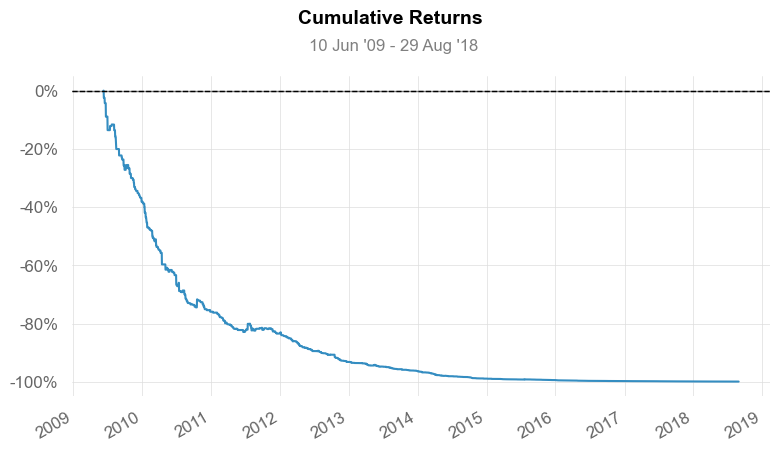

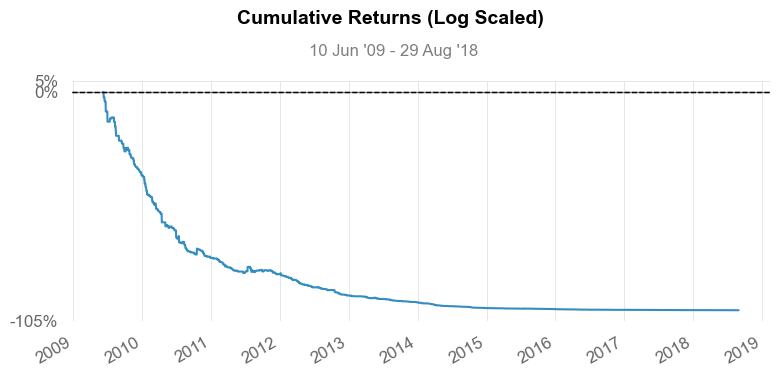

/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/_plotting/wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


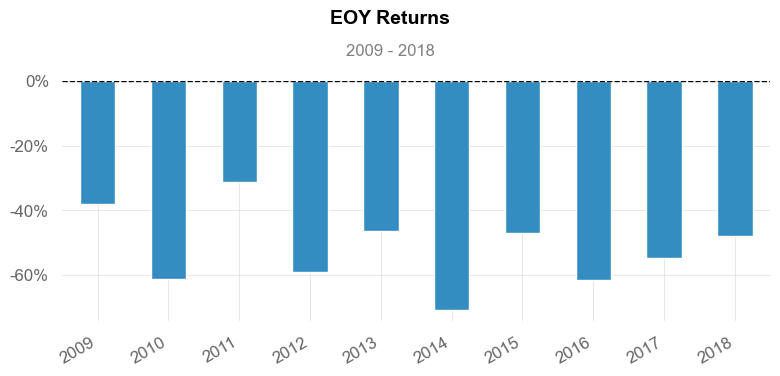

/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/_plotting/core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


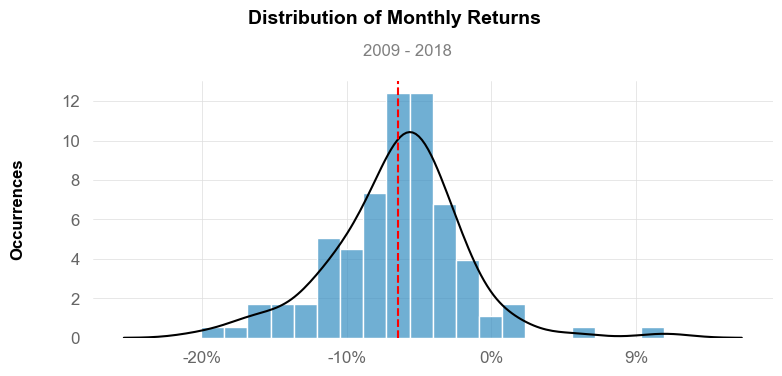

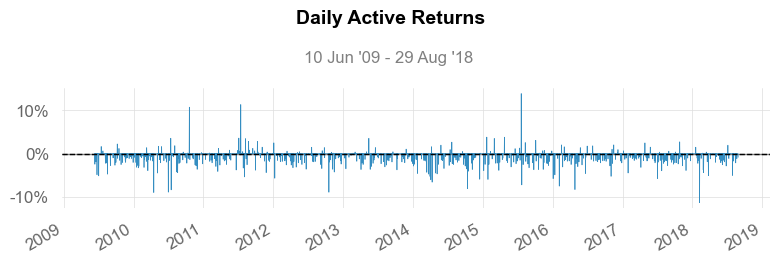

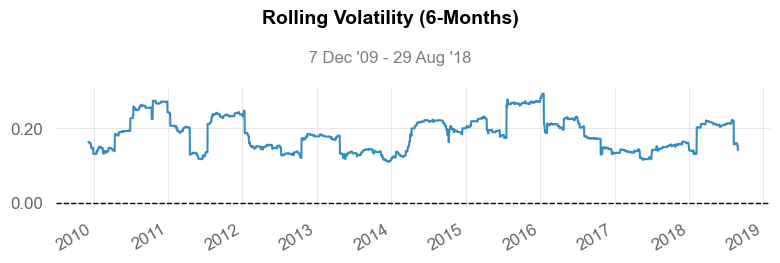

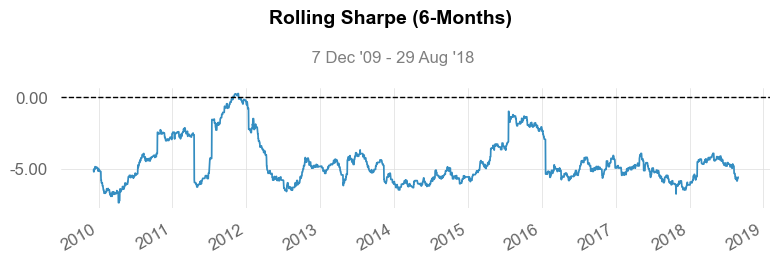

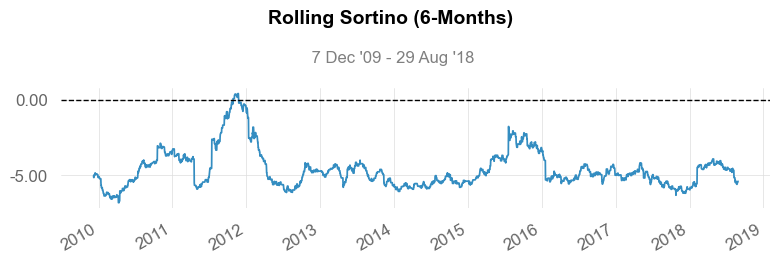

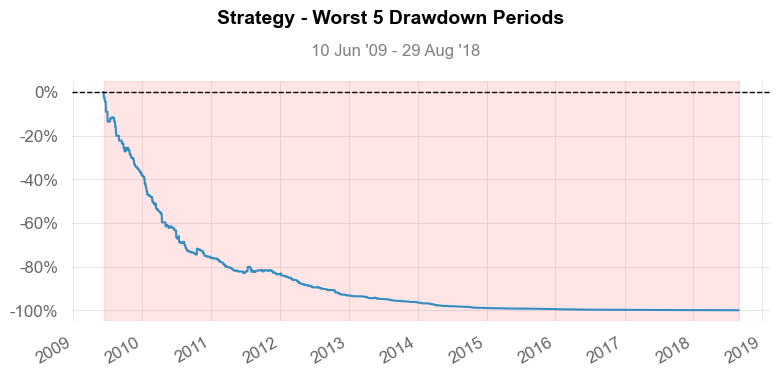

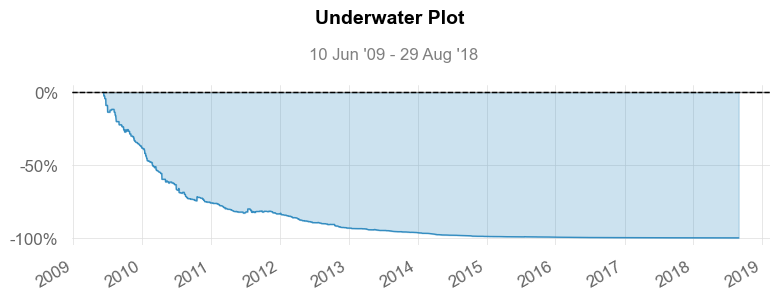

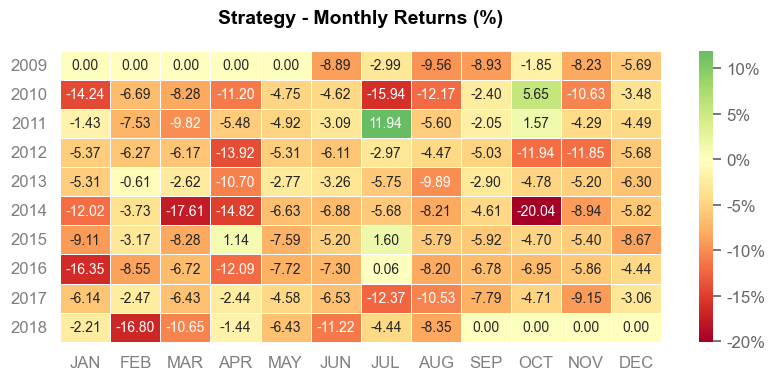

/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/_plotting/core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/quantstats/_plotting/core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-tr

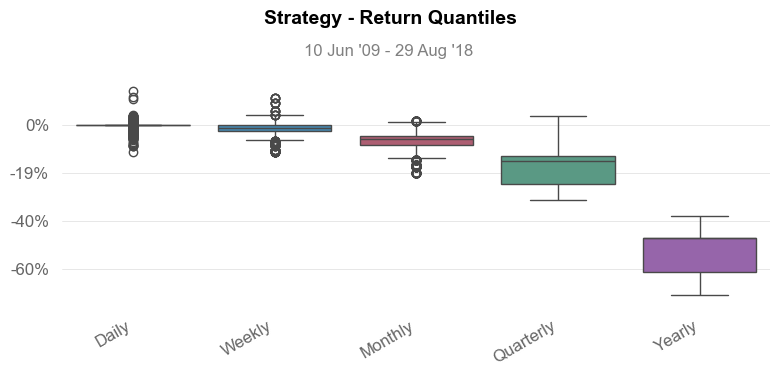

/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/gym-trading/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes an

In [8]:
qs.extend_pandas()

net_worth = pd.Series(env.unwrapped.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='SB3_a2c_quantstats.html')